In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
os.listdir()

['.ipynb_checkpoints', 'CNNmodel.ipynb', 'dataset']

In [2]:
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow Version: {tf.__version__}")
print(f"Number of GPUs Available: {len(tf.config.list_physical_devices('GPU'))}")

Tensorflow Version: 2.14.0
Number of GPUs Available: 0


In [3]:
train_dir = 'dataset/train'
test_dir = 'dataset/test'

In [4]:
from keras.utils import image_dataset_from_directory

train_generator = image_dataset_from_directory(train_dir, image_size=(64, 64), batch_size=32)
test_generator = image_dataset_from_directory(test_dir, image_size=(64, 64), batch_size=32)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


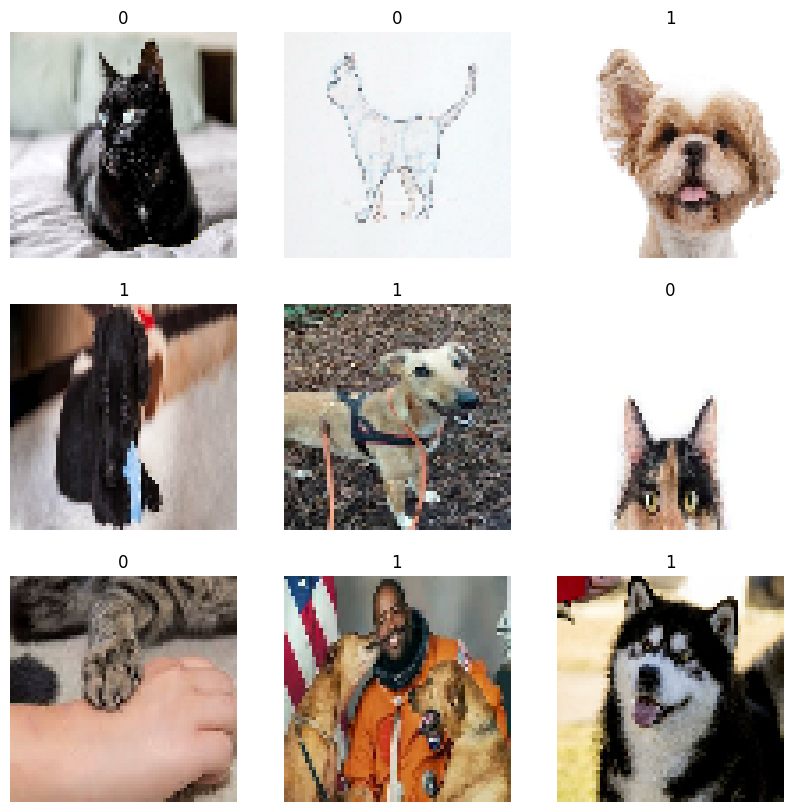

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [11]:
# building CNN
model = keras.Sequential([
    # Conv layer 1:
    keras.layers.Conv2D(128, (3, 3), input_shape=(64,64,3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    # Conv layer 2:
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    # Conv layer 3:
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    keras.layers.Flatten(),
    
    # fully connected layers:
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units =1, activation = 'sigmoid')
    
])

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics ='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 batch_normalization (Batch  (None, 62, 62, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 64)        256       
 chNormalization)                                                
                                                        

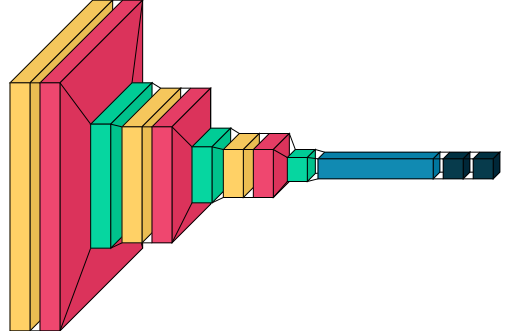

In [12]:
import visualkeras
visualkeras.layered_view(model)

In [13]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
red_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, verbose=1)
logs = model.fit(train_generator, epochs=50, validation_data=test_generator,validation_steps=2000/32, callbacks=[es, red_lr])

Epoch 1/50
18/18 [==============================] - 12s 485ms/step - loss: 0.8744 - accuracy: 0.5781 - val_loss: 4.8370 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
18/18 [==============================] - 8s 437ms/step - loss: 0.4735 - accuracy: 0.7630 - lr: 0.0010
Epoch 3/50
18/18 [==============================] - 8s 415ms/step - loss: 0.2592 - accuracy: 0.9156 - lr: 0.0010
Epoch 4/50
18/18 [==============================] - 8s 425ms/step - loss: 0.1407 - accuracy: 0.9677 - lr: 0.0010
Epoch 5/50
18/18 [==============================] - 8s 406ms/step - loss: 0.0715 - accuracy: 0.9946 - lr: 0.0010
Epoch 6/50
18/18 [==============================] - 8s 411ms/step - loss: 0.0373 - accuracy: 0.9964 - lr: 0.0010
Epoch 7/50
18/18 [==============================] - 8s 412ms/step - loss: 0.0240 - accuracy: 1.0000 - lr: 0.0010
Epoch 8/50
18/18 [==============================] - 8s 412ms/step - loss: 0.0145 - accuracy: 1.0000 - lr: 0.0010
Epoch 9/50
18/18 [==============================] - 8

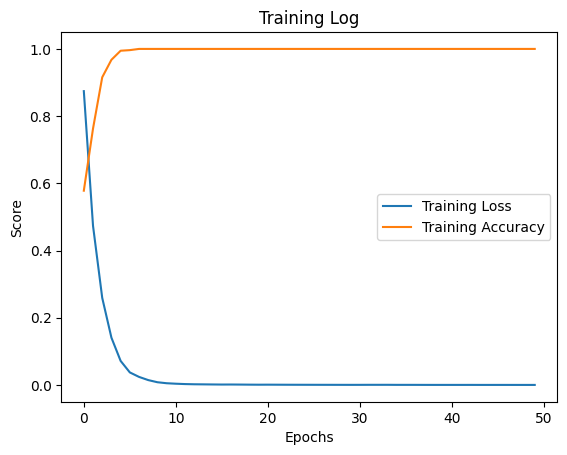

In [14]:
import matplotlib.pyplot as plt

plt.title('Training Log')
plt.plot(logs.history['loss'], label='Training Loss')
plt.plot(logs.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

In [15]:
res = model.evaluate(test_generator)

5/5 [==============================] - 1s 94ms/step - loss: 1.2081 - accuracy: 0.6714


In [17]:
accuracy = res[1]
accuracy * 100

67.14285612106323

In [4]:
def show_img(path):
    image_path = path  
    image = plt.imread(image_path)

    plt.figure(figsize=(2,2))
    plt.imshow(image)
    plt.axis('off')  
    plt.show()

In [20]:
img = keras.preprocessing.image.load_img(
    "dataset/test/cats/cat_109.jpg", 
    target_size=(64,64)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

1/1 [==============================] - 0s 42ms/step
This image is 99.72% cat and 0.28% dog.


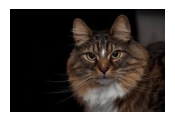

In [5]:
show_img('dataset/test/cats/cat_109.jpg')

In [23]:
img = keras.preprocessing.image.load_img(
    "dataset/test/dogs/dog_150.jpg", 
    target_size=(64,64)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(predictions[0])
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

1/1 [==============================] - 0s 54ms/step
This image is 14.19% cat and 85.81% dog.


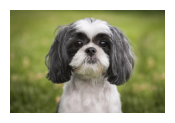

In [6]:
show_img("dataset/test/dogs/dog_150.jpg")

# Although the CNN model has accuracy of 67% it can be improved using pre-trained models like Xception, Inception